In [101]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
# Библиотека для работы с HTTP-запросами. Будем использовать ее для обращения к API HH
import requests

# Пакет для удобной работы с данными в формате json
import json
# Модуль для работы со значением времени
import time
# Модуль для работы с операционной системой. Будем использовать для работы с файлами
import os

In [174]:
def getPage(page = 0):
    """
    Создаем метод для получения страницы со списком вакансий.
    Аргументы:
        page - Индекс страницы, начинается с 0. Значение по умолчанию 0, т.е. первая страница
    """
     
    # Справочник для параметров GET-запроса
    params = {
        'text': 'NAME:Аналитик', # Текст фильтра. В имени должно быть слово "Аналитик"
        'area': 1, # Поиск ощуществляется по вакансиям города Москва
        'page': page, # Индекс страницы поиска на HH
        'per_page': 100 # Кол-во вакансий на 1 странице
    }
     
     
    req = requests.get('https://api.hh.ru/vacancies', params) # Посылаем запрос к API
    data = req.content.decode() # Декодируем его ответ, чтобы Кириллица отображалась корректно
    req.close()
    return data

In [183]:
data = json.loads(getPage(page = 0))

In [187]:
data['items'][0]['snippet']

{'requirement': 'Продвинутый уровень Excel – обязательно знание надстроек Excel Query и Pivot. Публикация отчетности в Powe BI и настройка прав доступа.',
 'responsibility': 'Анализ и обработка данных по трейд-маркетинговым мероприятиям и бюджету. Поддержка актуальности и оптимизация excel-шаблонов, калькуляторов, форм планирования и...'}

In [6]:

# Считываем первые 2000 вакансий
for page in tqdm(range(0, 20)):
      # Преобразуем текст ответа запроса в справочник Python
    jsObj = json.loads(getPage(page))
     
    # Сохраняем файлы в папку {путь до текущего документа со скриптом}\docs\pagination
    # Определяем количество файлов в папке для сохранения документа с ответом запроса
    # Полученное значение используем для формирования имени документа
    nextFileName = '/Users/karinahanova/Desktop/MTS.Teta/pagination/{}.json'.format(len(os.listdir('/Users/karinahanova/Desktop/MTS.Teta/pagination/')))
     
    # Создаем новый документ, записываем в него ответ запроса, после закрываем
    f = open(nextFileName, mode='w', encoding='utf8')
    f.write(json.dumps(jsObj, ensure_ascii=False))
    f.close()
     
    # Проверка на последнюю страницу, если вакансий меньше 2000
    if (jsObj['pages'] - page) <= 1:
        break
     
    # Необязательная задержка, но чтобы не нагружать сервисы hh, оставим. 5 сек мы может подождать
    time.sleep(0.25)
     
print('Старницы поиска собраны')

 95%|█████████▌| 19/20 [00:14<00:00,  1.27it/s]

Старницы поиска собраны


In [3]:
os.listdir('/Users/karinahanova/Desktop/MTS.Teta/pagination')

['16.json',
 '6.json',
 '7.json',
 '.DS_Store',
 '17.json',
 '10.json',
 '0.json',
 '1.json',
 '11.json',
 '2.json',
 '12.json',
 '13.json',
 '3.json',
 '8.json',
 '18.json',
 '4.json',
 '14.json',
 '15.json',
 '5.json',
 '19.json',
 '9.json']

In [15]:
# Получаем перечень ранее созданных файлов со списком вакансий и проходимся по нему в цикле 
for fl in tqdm(os.listdir('pagination')):
    if fl[-4:] == 'json':
     
    # Открываем файл, читаем его содержимое, закрываем файл
        f = open('pagination/{}'.format(fl), encoding='utf8')
        jsonText = f.read()
        f.close()
     
    # Преобразуем полученный текст в объект справочника
        jsonObj = json.loads(jsonText)
     
    # Получаем и проходимся по непосредственно списку вакансий
        for v in jsonObj['items']:
         
        # Обращаемся к API и получаем детальную информацию по конкретной вакансии
            req = requests.get(v['url'])
            data = req.content.decode()
            req.close()
         
        # Создаем файл в формате json с идентификатором вакансии в качестве названия
        # Записываем в него ответ запроса и закрываем файл
            fileName = 'vacancies/{}.json'.format(v['id'])
            f = open(fileName, mode='w', encoding='utf8')
            f.write(data)
            f.close()
         
            time.sleep(0.25)

 38%|███▊      | 8/21 [06:26<10:27, 48.26s/it]


ConnectionError: HTTPSConnectionPool(host='api.hh.ru', port=443): Max retries exceeded with url: /vacancies/46335787?host=hh.ru (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc80accafa0>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [19]:
with open("vacancies/46400329.json", "r") as read_file:
    data = json.load(read_file)


In [20]:
data['description']

'<p><strong>«Рексофт»</strong> — один из ведущих российских разработчиков программного обеспечения. Мы работаем в сфере ИТ-услуг с 1991 г. и за это время успели выполнить более 1000 проектов в области ИТ-консалтинга, проектирования, разработки, тестирования и поддержки ПО. Среди клиентов «Рексофта» крупнейшие международные и российские компании, такие как Федеральная Миграционная Служба России, «Сбербанк», ВТБ24, Промсвязьбанк, «Ростелеком», Tele2, FXDD, Philip Morris, Sicap, Swisscom Mobile, Tieto, StoraEnso, T-Systems и другие.<br />Головной офис «Рексофт» находится в Санкт-Петербурге. Также у компании есть филиалы в Москве, Воронеже и Ростове-на-Дону.<br /><br />Мы приглашаем в свою команду <strong>бизнес - аналитика</strong> для реализации интересных и масштабных проектов, сотрудника, настроенного на лидерство, готового решать сложные задачи и постоянно совершенствовать свои профессиональные качества.</p> <p><strong>Обязанности:</strong></p> <ul> <li>Разработка технических заданий 

In [4]:
from io import StringIO
from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

{'id': '46400329',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Бизнес-аналитик',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1',
  'name': 'Москва',
  'url': 'https://api.hh.ru/areas/1?host=hh.ru'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Варшавское шоссе',
  'building': '26',
  'description': None,
  'lat': 55.684503,
  'lng': 37.621947,
  'raw': 'Москва, Варшавское шоссе, 26',
  'metro': {'station_name': 'Нагатинская',
   'line_name': 'Серпуховско-Тимирязевская',
   'station_id': '9.85',
   'line_id': '9',
   'lat': 55.682099,
   'lng': 37.620917},
  'metro_stations': [{'station_name': 'Нагатинская',
    'line_name': 'Серпуховско-Тимирязевская',
    'station_id': '9.85',
    'line_id': '9',
    'lat': 55.682099,
    'lng': 37.620917}]},
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': '
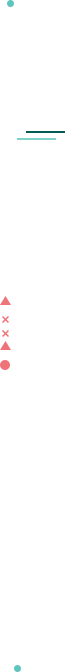

In [23]:
data

In [25]:
with open("vacancies/45904637.json", "r") as read_file:
    data = json.load(read_file)

In [26]:
data['address']

In [27]:
data['description']

'<p>Мы ищем исполнительного и внимательного системного аналитика на удаленную работу под проекты аутсорсинга разработки. Почасовая оплата.</p> <p>Основные направления проектов: ERP/BI/CRM и т.д. решения, стартапы.</p> <p><strong>Инфраструктура компании:</strong></p> <ul> <li>Confluence - вся документация проекта ведется</li> <li>Jira - постановка задач + учет времени</li> <li>GitLab - CI/CD настроены</li> <li>Discord - виртуальный офис для голосовой коммуникации</li> <li>Telegram - проектные каналы для переписки</li> </ul> <p>Работаем по &quot;неполному&quot; SCRUM с элементами PMI. Пока не внедрены, но планируем: работу по спринтам (сейчас календарный план проекта), story points (пока в часах оценка).</p> <p><strong>Задачи системного аналитика:</strong></p> <ul> <li>Сбор данных и анализ достаточности и качества поступающей от Заказчика информации</li> <li>Декомпозиция бизнес требований до уровня функциональных</li> <li>Описание инфраструктуры системы (логической) и подготовка специфик

In [28]:
pd.json_normalize(data)

,id,premium,relations,name,insider_interview,response_letter_required,address,allow_messages,department,contacts,...,schedule.name,employment.id,employment.name,employer.id,employer.name,employer.url,employer.alternate_url,employer.logo_urls,employer.vacancies_url,employer.trusted
0,45904637,False,[],Системный аналитик (System Analyst),None,False,None,True,None,None,...,Удаленная работа,full,Полная занятость,5457898,HS Systems,https://api.hh.ru/employers/5457898?host=hh.ru,https://hh.ru/employer/5457898,None,https://api.hh.ru/vacancies?employer_id=545789...,False


In [29]:
df = pd.json_normalize(data)

In [30]:
df.shape

(1, 62)

In [6]:
df = pd.DataFrame()
for file in os.listdir('vacancies'):
    if file[-4:] == 'json':
        filename = 'vacancies/' + file
        with open(filename, "r") as read_file:
            data = json.load(read_file)
            sub_df = pd.json_normalize(data)
            df = df.append(sub_df,ignore_index=True)
            
      

    

In [7]:
df

,id,premium,relations,name,insider_interview,response_letter_required,salary,allow_messages,department,contacts,...,vacancy_constructor_template.top_picture.width,vacancy_constructor_template.top_picture.path,vacancy_constructor_template.top_picture.blurred_path,vacancy_constructor_template.bottom_picture.height,vacancy_constructor_template.bottom_picture.width,vacancy_constructor_template.bottom_picture.path,vacancy_constructor_template.bottom_picture.blurred_path,vacancy_constructor_template.bottom_picture,insider_interview.id,insider_interview.url
0,46125607,False,[],Аналитик (middle),None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46555691,False,[],Аналитик,None,False,None,True,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46391210,False,[],Стажер-аналитик,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45827240,False,[],Маркетолог-аналитик,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,45416223,False,[],Аналитик рисков,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,46380300,False,[],Аналитик бизнес-процессов,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,46435236,False,[],Аналитик данных (по оценке доходности клиента),None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,44649302,False,[],Web-аналитик,None,False,NaN,True,None,None,...,1400.0,https://hhcdn.ru/branding-pictures/263035.jpeg,https://hhcdn.ru/branding-pictures-blurred/263...,352.0,770.0,https://hhcdn.ru/branding-pictures/263049.jpeg,https://hhcdn.ru/branding-pictures-blurred/263...,NaN,NaN,NaN
701,46524483,False,[],Аналитик,None,False,None,True,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['description'] = df['description'].apply(strip_tags)

In [9]:
df['description']

0      Привет! Мы ищем аналитика на один из проектов ...
1      Лидер приглашает лучших!   Вас ожидают следующ...
2      Примени свои знания и прокачай навыки для созд...
3      Обязанности:  Проведение сегментации клиентско...
4      Мы создаем и развиваем высокотехнологичный онл...
                             ...                        
698    В команду автоматизации каналов привлечения мы...
699    Обязанности:  полный цикл аналитической работы...
700    Мы - крупная и активно развивающаяся омниканал...
701    LEOMAX — лидер рынка телевизионной торговли Ро...
702    Департамент информационных технологий города М...
Name: description, Length: 703, dtype: object

In [10]:
df['key_skills'][0]

[{'name': 'Работа в команде'}, {'name': 'Проектная документация'}]

In [11]:
[d['name'] for d in df['key_skills'][0]]

['Работа в команде', 'Проектная документация']

In [12]:
for i in range(len(df)):
    df['key_skills'][i] = [d['name'] for d in df['key_skills'][i]]

<ipython-input-12-de968b8e5da3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['key_skills'][i] = [d['name'] for d in df['key_skills'][i]]


In [13]:
df.shape

(703, 97)

In [14]:
df['key_skills']

0             [Работа в команде, Проектная документация]
1                                                     []
2                                                     []
3      [Маркетинговые исследования, Проведение презен...
4      [SQL, Power BI, MS Access, Business intelligen...
                             ...                        
698    [Аналитическое мышление, Бизнес-анализ, Делова...
699                                                [SQL]
700    [Google Analytics, Интернет-реклама, SQL, Янде...
701    [Аналитическое мышление, Работа в Excel, Анали...
702    [MS PowerPoint, Python, Подготовка презентаций...
Name: key_skills, Length: 703, dtype: object

In [15]:
df_copy = df.copy()


In [16]:
df_copy['specializations'][0]

[{'id': '1.25',
  'name': 'Аналитик',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'}]

In [17]:
df['specializations'][0]

[{'id': '1.25',
  'name': 'Аналитик',
  'profarea_id': '1',
  'profarea_name': 'Информационные технологии, интернет, телеком'}]

In [47]:
[[d['name'],d['profarea_name']] for d in df['specializations'][0]]

[['Аналитик', 'Информационные технологии, интернет, телеком']]

In [18]:
df['profarea_name'] = None
for i in range(len(df)):
    df['profarea_name'][i] = [d['profarea_name'] for d in df['specializations'][i]]
    df['specializations'][i] = [d['name'] for d in df['specializations'][i]]
  

<ipython-input-18-cab69270669f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profarea_name'][i] = [d['profarea_name'] for d in df['specializations'][i]]
<ipython-input-18-cab69270669f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['specializations'][i] = [d['name'] for d in df['specializations'][i]]


In [19]:
df.shape

(703, 98)

In [20]:
df['profarea_name']

0         [Информационные технологии, интернет, телеком]
1      [Банки, инвестиции, лизинг, Страхование, Страх...
2      [Начало карьеры, студенты, Информационные техн...
3      [Маркетинг, реклама, PR, Маркетинг, реклама, P...
4      [Банки, инвестиции, лизинг, Банки, инвестиции,...
                             ...                        
698    [Консультирование, Консультирование, Информаци...
699    [Банки, инвестиции, лизинг, Банки, инвестиции,...
700     [Маркетинг, реклама, PR, Маркетинг, реклама, PR]
701    [Продажи, Закупки, Маркетинг, реклама, PR, Мар...
702    [Бухгалтерия, управленческий учет, финансы пре...
Name: profarea_name, Length: 703, dtype: object

In [21]:
df['specializations']

0                                             [Аналитик]
1      [Аналитик, Андеррайтер, Начальный уровень, Мал...
2      [Информационные технологии, Интернет, Мультиме...
3      [Below The Line (BTL), Исследования рынка, Про...
4      [Риски: кредитные, Риски: прочие, Риски: опера...
                             ...                        
698    [Реинжиниринг бизнес процессов, Управление про...
699    [Аналитик, Риски: кредитные, Методология, Банк...
700                       [Исследования рынка, Аналитик]
701    [FMCG, Товары народного потребления, FMCG, Тов...
702                 [Аудит, Финансовый анализ, Аналитик]
Name: specializations, Length: 703, dtype: object

In [26]:
df.columns

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'salary', 'allow_messages', 'department',
       'contacts', 'description', 'branded_description',
       'vacancy_constructor_template', 'key_skills', 'accept_handicapped',
       'accept_kids', 'archived', 'response_url', 'specializations', 'code',
       'hidden', 'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'published_at', 'created_at',
       'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url',
       'has_test', 'test', 'alternate_url', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'billing_type.id', 'billing_type.name', 'area.id', 'area.name',
       'area.url', 'type.id', 'type.name', 'address.city', 'address.street',
       'address.building', 'address.description', 'address.lat', 'address.lng',
       'address.raw', 'address.metro.station_name', 'address.metro.line_name'

In [29]:
df['working_time_modes'].isna().sum()

0

In [31]:
df['schedule.name'].value_counts()

Полный день         567
Удаленная работа    113
Гибкий график        20
Сменный график        3
Name: schedule.name, dtype: int64

In [33]:
df['schedule.name'].isna().sum()

0

In [35]:
df['working_time_intervals'].isna().sum()

0

In [37]:
df['working_time_modes'].isna().sum()

0

<AxesSubplot:>

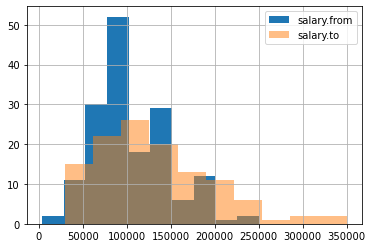

In [49]:
df['salary.from'].hist(legend = 'salary.from')
df['salary.to'].hist(alpha = 0.5, legend = 'salary.to')

In [71]:
df['salary.gross'].isna().sum()

506

In [67]:
jun = []
mid = []
for i in df['name']:
    if "стажер" in i or 'junior' in i or 'Junior' in i:
        jun.append(i)
    if 'middle' in i or 'Middle' in i:
        mid.append(i)

In [68]:
jun

['Junior Web Analyst / Младший Веб-Аналитик',
 'Аналитик-стажер',
 'Junior аналитик данных',
 'Junior Analyst CRM / Младший аналитик CRM',
 'Junior SQL Analyst / Младший SQL Аналитик',
 'Junior Product Analyst / Младший продуктовый аналитик',
 'Бизнес-аналитик (Junior)',
 'Аналитик / junior аналитик',
 'Бизнес-аналитик (junior)']

In [69]:
mid

['Аналитик (middle)',
 'Продуктовый аналитик-Игровой аналитик (Product Analyst / Game Analyst, Middle)',
 'Аналитик (pre-middle)',
 'Middle ML-аналитик']

<AxesSubplot:>

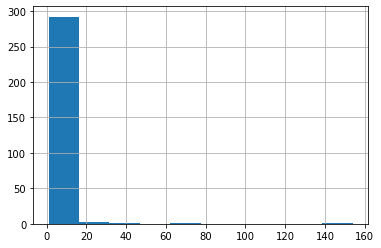

In [63]:
df['name'].value_counts().hist()

In [64]:
df['name'].value_counts()

Аналитик                                                                          154
Бизнес-аналитик                                                                    77
Системный аналитик                                                                 40
Аналитик данных                                                                    24
Продуктовый аналитик                                                               17
                                                                                 ... 
Продуктовый аналитик-Игровой аналитик (Product Analyst / Game Analyst, Middle)      1
Junior Analyst CRM / Младший аналитик CRM                                           1
Бизнес-аналитик / Системный аналитик                                                1
Менеджер аналитик                                                                   1
Аналитик со знанием SQL                                                             1
Name: name, Length: 297, dtype: int64

In [72]:
df['created_at']

0      2021-07-20T18:00:16+0300
1      2021-07-27T12:32:42+0300
2      2021-07-26T18:52:07+0300
3      2021-07-26T15:44:55+0300
4      2021-07-26T20:05:55+0300
                 ...           
698    2021-07-20T14:23:22+0300
699    2021-07-23T15:44:50+0300
700    2021-07-24T13:23:53+0300
701    2021-07-26T14:04:38+0300
702    2021-07-07T12:20:16+0300
Name: created_at, Length: 703, dtype: object

In [81]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y%m%d')

In [93]:
df['created_at'] = df['created_at'].dt.date

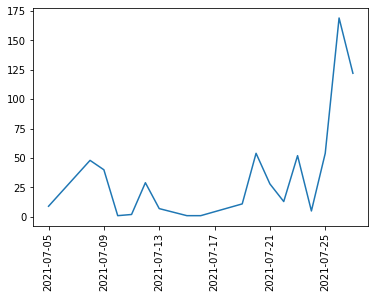

In [104]:
df['created_at'].value_counts().sort_index().plot()
plt.xticks(rotation = 90)
plt.show()

In [114]:
df['description'][0]

'Привет! Мы ищем аналитика на один из проектов нашей компании. Обязанности:  Взаимодействие с заказчиком. Работа с требованиями. Разработка бизнес-процессов Разработка проектной и эксплуатационной документации Постановка задач разработчикам  Требования:  Опыт работы от 1 года на должности аналитика или системного аналитика. Опыт работы постановки задач разработчикам, разработка макетов экранных форм. Опыт в подготовке эксплуатационной документации.  Условия: У нас уютный офис в самом центре города, замечательные ребята на проекте, да и в компании, в целом :) , официальное трудоустройство, достойный уровень ЗП, премии, ДМС, тренажер, корпоративное питание, внешнее обучение и интересные задачи. График работы 5/2, старт работы варьируется с 9 до 11. Наш процесс найма:- собеседование с HR по скайпу или zoom (30 минут).- очное/онлайн собеседование с РП и тимлидом (1 час) + небольшое тестовое задание. Откликайся, пиши, задавай вопросы, если они есть, так мы быстрее найдёмся :)  '

In [118]:
df['description'][0].partition("Требования")

('Привет! Мы ищем аналитика на один из проектов нашей компании. Обязанности:  Взаимодействие с заказчиком. Работа с требованиями. Разработка бизнес-процессов Разработка проектной и эксплуатационной документации Постановка задач разработчикам  ',
 'Требования',
 ':  Опыт работы от 1 года на должности аналитика или системного аналитика. Опыт работы постановки задач разработчикам, разработка макетов экранных форм. Опыт в подготовке эксплуатационной документации.  Условия: У нас уютный офис в самом центре города, замечательные ребята на проекте, да и в компании, в целом :) , официальное трудоустройство, достойный уровень ЗП, премии, ДМС, тренажер, корпоративное питание, внешнее обучение и интересные задачи. График работы 5/2, старт работы варьируется с 9 до 11. Наш процесс найма:- собеседование с HR по скайпу или zoom (30 минут).- очное/онлайн собеседование с РП и тимлидом (1 час) + небольшое тестовое задание. Откликайся, пиши, задавай вопросы, если они есть, так мы быстрее найдёмся :)  ')

In [122]:
df['description'][0].split('Требования'and'Условия')

['Привет! Мы ищем аналитика на один из проектов нашей компании. Обязанности:  Взаимодействие с заказчиком. Работа с требованиями. Разработка бизнес-процессов Разработка проектной и эксплуатационной документации Постановка задач разработчикам  Требования:  Опыт работы от 1 года на должности аналитика или системного аналитика. Опыт работы постановки задач разработчикам, разработка макетов экранных форм. Опыт в подготовке эксплуатационной документации.  ',
 ': У нас уютный офис в самом центре города, замечательные ребята на проекте, да и в компании, в целом :) , официальное трудоустройство, достойный уровень ЗП, премии, ДМС, тренажер, корпоративное питание, внешнее обучение и интересные задачи. График работы 5/2, старт работы варьируется с 9 до 11. Наш процесс найма:- собеседование с HR по скайпу или zoom (30 минут).- очное/онлайн собеседование с РП и тимлидом (1 час) + небольшое тестовое задание. Откликайся, пиши, задавай вопросы, если они есть, так мы быстрее найдёмся :)  ']

In [133]:
import re
re.findall(r'Требования(.*)Условия', df['description'][0])

[':  Опыт работы от 1 года на должности аналитика или системного аналитика. Опыт работы постановки задач разработчикам, разработка макетов экранных форм. Опыт в подготовке эксплуатационной документации.  ']

In [135]:
df['description'][2]

'Примени свои знания и прокачай навыки для создания клиентских проектов для большого бренда.  «Билайн» сейчас – динамичная компания изменений. Мы строим цифровую data-driven компанию, и ты можешь нам в этом помочь. В РОЛИ СТАЖЕРА ТЫ НАУЧИШЬСЯ:  Координировать проекты подразделения ("снятие" статусов, сбор и консолидация информации и пр Подготовке драфтов презентаций по активностям Работе с большим массивом данных с целью аналитики    МЫ ОЖИДАЕМ ОТ ТЕБЯ:  Уверенный пользователь в Excel(ВПР, ИНДЕКС, МАКС, ЕСЛИ, И, ИЛИ, СУММЕСЛИ, СРЗНАЧ и т.д.) MS PowerPoint Знание SQL, Access будет преимуществом    ЧТО ЖДЕТ ТЕБЯ В БИЛАЙН?  Оплачиваемая стажировка в соответствии с количеством рабочих часов. Свобода - Beefree - гибкий рабочий график от 35 до 40 часов. Работай везде, где есть интернет. Стажировка длится год - ты успеешь глубоко изучить свое направление и принять участие в серьезных проектах. Комфортная рабочая атмосфера: дружелюбные коллеги и мотивирующие руководители. Авторские онлайн-курс

In [140]:
with open("vacancies/46527984.json", "r") as read_file:
    data = json.load(read_file)

In [149]:
df['experience.name'].value_counts()

От 1 года до 3 лет    423
От 3 до 6 лет         183
Нет опыта              91
Более 6 лет             6
Name: experience.name, dtype: int64

df.columns нужные: name

df.columns НЕ нужные:
relations (списки пустые)
insider_interview
df['response_letter_required'].sum() = 10

In [150]:
df.columns

Index(['id', 'premium', 'relations', 'name', 'insider_interview',
       'response_letter_required', 'salary', 'allow_messages', 'department',
       'contacts', 'description', 'branded_description',
       'vacancy_constructor_template', 'key_skills', 'accept_handicapped',
       'accept_kids', 'archived', 'response_url', 'specializations', 'code',
       'hidden', 'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'published_at', 'created_at',
       'negotiations_url', 'suitable_resumes_url', 'apply_alternate_url',
       'has_test', 'test', 'alternate_url', 'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'billing_type.id', 'billing_type.name', 'area.id', 'area.name',
       'area.url', 'type.id', 'type.name', 'address.city', 'address.street',
       'address.building', 'address.description', 'address.lat', 'address.lng',
       'address.raw', 'address.metro.station_name', 'address.metro.line_name'

In [168]:
features = pd.DataFrame()
features.append
for i in df.columns[1:4]:
    print(i, pd.Series(df[i].value_counts()))

premium False    697
True       6
Name: premium, dtype: int64
relations []    703
Name: relations, dtype: int64
name Аналитик                                                                          154
Бизнес-аналитик                                                                    77
Системный аналитик                                                                 40
Аналитик данных                                                                    24
Продуктовый аналитик                                                               17
                                                                                 ... 
Продуктовый аналитик-Игровой аналитик (Product Analyst / Game Analyst, Middle)      1
Junior Analyst CRM / Младший аналитик CRM                                           1
Бизнес-аналитик / Системный аналитик                                                1
Менеджер аналитик                                                                   1
Аналитик со знанием SQL

In [171]:
with open("vacancies/46400329.json", "r") as read_file:
    data = json.load(read_file)

In [173]:
data['item']

KeyError: 'item'